In [1]:
!pip install Keras-Preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,SpatialDropout1D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix
import seaborn
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import cufflinks as cf
import tensorflow
from tensorflow.keras import Sequential
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import keras
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences as pad
from sklearn.preprocessing import LabelEncoder
import re
import pickle
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,SpatialDropout1D
from keras_preprocessing.sequence import pad_sequences as pad
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
!pip install git+https://github.com/paulgavrikov/visualkeras
import visualkeras
from sklearn.metrics import  confusion_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-17jgy4wh
  Running command git clone --filter=blob:none --quiet https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-17jgy4wh
  Resolved https://github.com/paulgavrikov/visualkeras to commit cd169b81be347e2090353ad6fe2bd2e1f4020cf4
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 8.2 MB/s eta 0:00:00
  Created wheel for visualkeras: filename=visualkeras-0.0.2-py3-none-any.whl size=13714 sha256=b16c0ea5cea1fd714facd1396da7f3fcbe365ee7c5b05b9bf38259f43332b87c
  Stored in directory: /tmp/pip-ephem-wheel-cache-39w3ez7a/wheels/89/d3/c2/937382b33c09192fc84331bbc02c4565d62aeae67e9684c37e
Successfully built visualkeras


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Directory for Mam**

In [4]:
# df=pd.read_csv("/content/drive/MyDrive/MY RESEARCH/EMNLP/Dataset/blp23_sentiment_train.csv")

In [5]:
# file_path="/content/drive/MyDrive/MY RESEARCH/EMNLP/Dataset/blp23_sentiment_train.csv"

# **Directory for Rajesh**

In [6]:
file_path="/content/drive/MyDrive/Research Work/Violence Project/Dataset/train.csv"

In [7]:
df=pd.read_csv("/content/drive/MyDrive/Research Work/Violence Project/Dataset/train.csv")

In [8]:
testdf=pd.read_csv("/content/drive/MyDrive/Research Work/Violence Project/Dataset/test.csv")

In [9]:
label_mapping = {
    0: 'Non-Violence',
    1: 'Passive Violence',
    2: 'Direct Violence'
}

In [10]:
# Rename the label column
df['label'] = df['label'].replace(label_mapping)
testdf['label'] = testdf['label'].replace(label_mapping)

In [11]:
# Print the updated counts
print("Total Comment:", len(df),
      "\nTotal Direct Violence:", len(df[df['label'] == 'Direct Violence']),
      "\nTotal Passive Violence:", len(df[df['label'] == 'Passive Violence']),
      "\nTotal Non-Violence:", len(df[df['label'] == 'Non-Violence']))

Total Comment: 2700 
Total Direct Violence: 389 
Total Passive Violence: 922 
Total Non-Violence: 1389


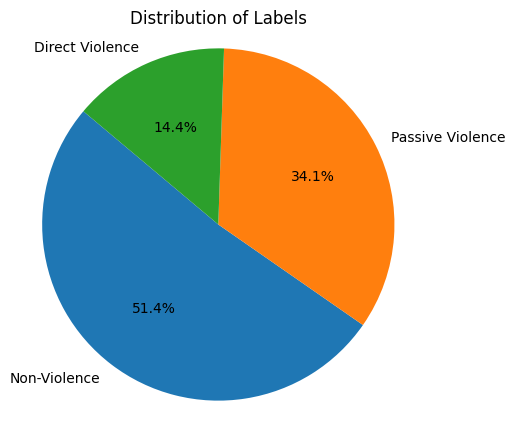

In [12]:
import matplotlib.pyplot as plt

# Calculate the label counts
label_counts = df['label'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

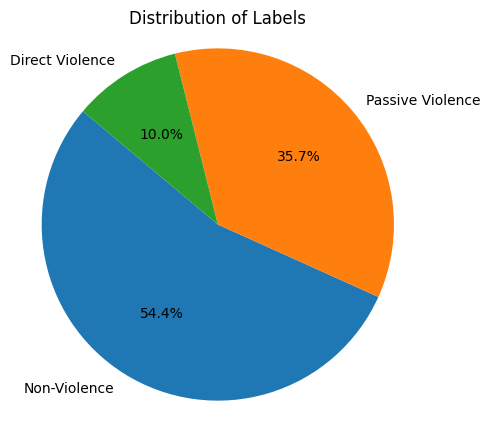

In [13]:
import matplotlib.pyplot as plt

# Calculate the label counts
label_counts = testdf['label'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

In [14]:
df.dtypes

text     object
label    object
dtype: object

In [15]:
df.head()

,text,label
0,যে দেশে সন্ত্রাসরা দেশ চালায়সে দেশে শান্তি কিভ...,Passive Violence
1,এই বিচার শেষ বিচার নয়।আসল বিচার হবে আল্লাহর আদ...,Non-Violence
2,আরব দেশগুলোকে বলব ভারতের সাথে সব ব্যবসা বাণিজ্...,Direct Violence
3,দেশটা সুস্থ নাই,Non-Violence
4,আপনার কথা দুঃখ জনক আগে বিডিও থাকলে কেন ধরা হলন...,Non-Violence


In [16]:
testdf.head()

,text,label
0,বাংলাদেশের হিন্দুরা নিজেদের জন্য আলাদা হিন্দু ...,Non-Violence
1,মাইজদী - চৌমুহুনী - ফেনী মন্দিরে হামলা নিয়ে রি...,Non-Violence
2,"দয়া করে পবিত্র কুরআনুল কারিম বলেন,,,,পবিত্র কথ...",Non-Violence
3,বিবিসি হলো সত্য কে বিনষ্টকারী আর মিথ্যা কে গ্র...,Passive Violence
4,বুধবার কি তোরা মারা গেছিলি বিবিসি বাংলা,Passive Violence


In [17]:
testdf.shape

(2016, 2)

In [18]:
df.head()

,text,label
0,যে দেশে সন্ত্রাসরা দেশ চালায়সে দেশে শান্তি কিভ...,Passive Violence
1,এই বিচার শেষ বিচার নয়।আসল বিচার হবে আল্লাহর আদ...,Non-Violence
2,আরব দেশগুলোকে বলব ভারতের সাথে সব ব্যবসা বাণিজ্...,Direct Violence
3,দেশটা সুস্থ নাই,Non-Violence
4,আপনার কথা দুঃখ জনক আগে বিডিও থাকলে কেন ধরা হলন...,Non-Violence


In [19]:
df.shape

(2700, 2)

In [20]:
testdf.label.unique()

array(['Non-Violence', 'Passive Violence', 'Direct Violence'],
      dtype=object)

In [21]:
df.label.unique()

array(['Passive Violence', 'Non-Violence', 'Direct Violence'],
      dtype=object)

In [22]:
df.dtypes

text     object
label    object
dtype: object

# **Convert the Datatypes for label**

In [23]:
print(type(df['label'][0]))

<class 'str'>


In [24]:
print(type(testdf['label'][0]))

<class 'str'>


In [25]:
df['label'] = df['label'].apply(lambda x: str(x))

In [26]:
testdf['label'] = testdf['label'].apply(lambda x: str(x))

In [27]:
# Print the updated counts
print("Total Comment:", len(df),
      "\nTotal Direct Violence:", len(df[df['label'] == 'Direct Violence']),
      "\nTotal Passive Violence:", len(df[df['label'] == 'Passive Violence']),
      "\nTotal Non-Violence:", len(df[df['label'] == 'Non-Violence']))

Total Comment: 2700 
Total Direct Violence: 389 
Total Passive Violence: 922 
Total Non-Violence: 1389


In [28]:
# Print the updated counts
print("Total Comment:", len(testdf),
      "\nTotal Direct Violence:", len(testdf[testdf['label'] == 'Direct Violence']),
      "\nTotal Passive Violence:", len(testdf[testdf['label'] == 'Passive Violence']),
      "\nTotal Non-Violence:", len(testdf[testdf['label'] == 'Non-Violence']))

Total Comment: 2016 
Total Direct Violence: 201 
Total Passive Violence: 719 
Total Non-Violence: 1096


My Data is not Label, Now I want to Label My Data using sampling

# **Remove Duplicates**

In [29]:
testdf.shape

(2016, 2)

In [30]:
df.shape

(2700, 2)

In [31]:
df.drop_duplicates(inplace=True)

In [32]:
testdf.drop_duplicates(inplace=True)

In [33]:
df.shape

(2700, 2)

In [34]:
testdf.shape

(2016, 2)

Here Are no duplicate values

# **In this section I want to check null value**

In [35]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [36]:
testdf.isnull().sum()

text     0
label    0
dtype: int64

# **Remove Small Text and Long Text**

In [37]:
df['no_char'] = df['text'].apply(lambda Sentence: len(Sentence))

In [38]:
df['length'] = df['text'].apply(lambda x:len(x.split()))

In [39]:
dataset = df.loc[df.length>2]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small conversations".format(len(df)-len(dataset)),
      "\nTotal conversations:",len(dataset))

After Cleaning: 
Removed 47 Small conversations 
Total conversations: 2653


In [40]:
dataset.shape

(2653, 4)

In [41]:
testdf['no_char'] = testdf['text'].apply(lambda Sentence: len(Sentence))

In [42]:
testdf['length'] = testdf['text'].apply(lambda x:len(x.split()))

In [43]:
testdataset = testdf.loc[testdf.length>2]
testdataset = testdataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small conversations".format(len(testdf)-len(testdataset)),
      "\nTotal conversations:",len(testdataset))

After Cleaning: 
Removed 1 Small conversations 
Total conversations: 2015


In [44]:
newdf = dataset.loc[dataset['length'] <= 60]
newdf = newdf.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Big conversations".format(len(dataset)-len(newdf)),
      "\nTotal conversations:",len(newdf))

After Cleaning: 
Removed 61 Big conversations 
Total conversations: 2592


In [45]:
newtestdf = testdataset.loc[testdataset['length'] <= 60]
newtestdf = newtestdf.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Big conversations".format(len(testdataset)-len(newtestdf)),
      "\nTotal conversations:",len(newtestdf))

After Cleaning: 
Removed 56 Big conversations 
Total conversations: 1959


In [46]:
newdf.shape

(2592, 4)

In [47]:
newtestdf.shape

(1959, 4)

In [48]:
df=newdf.copy()

In [49]:
testdf=newtestdf.copy()

In [50]:
df.shape

(2592, 4)

In [51]:
testdf.shape

(1959, 4)

In [52]:
df.head()

,text,label,no_char,length
0,যে দেশে সন্ত্রাসরা দেশ চালায়সে দেশে শান্তি কিভ...,Passive Violence,60,10
1,এই বিচার শেষ বিচার নয়।আসল বিচার হবে আল্লাহর আদ...,Non-Violence,88,15
2,আরব দেশগুলোকে বলব ভারতের সাথে সব ব্যবসা বাণিজ্...,Direct Violence,120,22
3,দেশটা সুস্থ নাই,Non-Violence,15,3
4,আপনার কথা দুঃখ জনক আগে বিডিও থাকলে কেন ধরা হলন...,Non-Violence,83,16


In [53]:
testdf.head()

,text,label,no_char,length
0,বাংলাদেশের হিন্দুরা নিজেদের জন্য আলাদা হিন্দু ...,Non-Violence,92,14
1,মাইজদী - চৌমুহুনী - ফেনী মন্দিরে হামলা নিয়ে রি...,Non-Violence,57,10
2,"দয়া করে পবিত্র কুরআনুল কারিম বলেন,,,,পবিত্র কথ...",Non-Violence,77,11
3,বিবিসি হলো সত্য কে বিনষ্টকারী আর মিথ্যা কে গ্র...,Passive Violence,53,9
4,বুধবার কি তোরা মারা গেছিলি বিবিসি বাংলা,Passive Violence,39,7


# **Below I have cleaned my dataset (Puncuation,links, emoji, non-character)**

In [54]:
import pandas as pd
import regex as re

def remove_non_bengali_characters(sentence):
    cleaned_sentence = re.sub(r'\P{Bengali}+', ' ', sentence)
    return cleaned_sentence.strip()

In [55]:
df['Sentences'] = df['text'].apply(remove_non_bengali_characters)

In [56]:
df.drop(["text","no_char"],axis=1,inplace=True)

In [57]:
df.head()

,label,length,Sentences
0,Passive Violence,10,যে দেশে সন্ত্রাসরা দেশ চালায়সে দেশে শান্তি কিভ...
1,Non-Violence,15,এই বিচার শেষ বিচার নয় আসল বিচার হবে আল্লাহর আদ...
2,Direct Violence,22,আরব দেশগুলোকে বলব ভারতের সাথে সব ব্যবসা বাণিজ্...
3,Non-Violence,3,দেশটা সুস্থ নাই
4,Non-Violence,16,আপনার কথা দুঃখ জনক আগে বিডিও থাকলে কেন ধরা হলন...


In [58]:
import re

# Define a regular expression pattern to match Bengali characters and spaces
bengali_pattern = re.compile("[\u0980-\u09FF ]+")

# Function to remove non-Bengali characters from a string
def remove_non_bengali_chars(text):
    return "".join(filter(bengali_pattern.match, text))

# Apply the function to each element in your dataset
df['Bengali_Text'] = df['Sentences'].apply(remove_non_bengali_chars)


In [59]:
df.drop(["Sentences","length"],axis=1,inplace=True)

In [60]:
df.head()

,label,Bengali_Text
0,Passive Violence,যে দেশে সন্ত্রাসরা দেশ চালায়সে দেশে শান্তি কিভ...
1,Non-Violence,এই বিচার শেষ বিচার নয় আসল বিচার হবে আল্লাহর আদ...
2,Direct Violence,আরব দেশগুলোকে বলব ভারতের সাথে সব ব্যবসা বাণিজ্...
3,Non-Violence,দেশটা সুস্থ নাই
4,Non-Violence,আপনার কথা দুঃখ জনক আগে বিডিও থাকলে কেন ধরা হলন...


# **Remove Stopwords**

# **This Directory for mam**

In [61]:
# def process_conversations(Conversation):
#     stp = open('/content/drive/MyDrive/MY RESEARCH/EMNLP/Dataset/Stopwords.txt','r',encoding="utf8").read().split()
#     result = Conversation.split()
#     Conversation = [word.strip() for word in result if word not in stp ]
#     Conversation =" ".join(Conversation)
#     Conversation = re.sub('[^\u0980-\u09FF]',' ',str(Conversation))
#     return Conversation

In [62]:
# df['cleaned'] = df['Bengali_Text'].apply(process_conversations)
# sample_data = [10,400]
# for i in sample_data:
#      print('Original:\n',df.Bengali_Text[i],'\nCleaned:\n',
#            df.cleaned[i],'\n','Detected as:-- ',df.label[i],'\n')

In [63]:
def process_conversations(Conversation):
    stp = open('/content/drive/MyDrive/Research Work/EMNLP/Dataset2/Stopwords.txt','r',encoding="utf8").read().split()
    result = Conversation.split()
    Conversation = [word.strip() for word in result if word not in stp ]
    Conversation =" ".join(Conversation)
    Conversation = re.sub('[^\u0980-\u09FF]',' ',str(Conversation))
    return Conversation

In [64]:
df['cleaned'] = df['Bengali_Text'].apply(process_conversations)
sample_data = [10,400]
for i in sample_data:
     print('Original:\n',df.Bengali_Text[i],'\nCleaned:\n',
           df.cleaned[i],'\n','Detected as:-- ',df.label[i],'\n')

Original:
 ক্ষুব্ধ শিক্ষার্থীদের হল বন্ধ করার দিদ্ধান্তটি আরোবেশি খারাপ করবে 
Cleaned:
 ক্ষুব্ধ শিক্ষার্থীদের বন্ধ দিদ্ধান্তটি আরোবেশি খারাপ 
 Detected as:--  Non-Violence 

Original:
 আকাশ ভরা তারা ব্যবসায়ের গোয়া মারা সারা 
Cleaned:
 আকাশ ভরা ব্যবসায়ের গোয়া মারা সারা 
 Detected as:--  Non-Violence 



In [65]:
df.head()

,label,Bengali_Text,cleaned
0,Passive Violence,যে দেশে সন্ত্রাসরা দেশ চালায়সে দেশে শান্তি কিভ...,দেশে সন্ত্রাসরা দেশ চালায়সে দেশে শান্তি কিভাবে...
1,Non-Violence,এই বিচার শেষ বিচার নয় আসল বিচার হবে আল্লাহর আদ...,বিচার শেষ বিচার আসল বিচার আল্লাহর আদালতে সেইদি...
2,Direct Violence,আরব দেশগুলোকে বলব ভারতের সাথে সব ব্যবসা বাণিজ্...,আরব দেশগুলোকে বলব ভারতের সাথে ব্যবসা বাণিজ্য ব...
3,Non-Violence,দেশটা সুস্থ নাই,দেশটা সুস্থ
4,Non-Violence,আপনার কথা দুঃখ জনক আগে বিডিও থাকলে কেন ধরা হলন...,কথা দুঃখ জনক বিডিও থাকলে হলনা হিন্দু দের খতি হ...


# **Stemming**

In [66]:
# from nltk.stem import PorterStemmer
# stemmer = PorterStemmer()

# def stemming (text):
#     return ''.join([stemmer.stem(word) for word in text])

# df['cleaned']=df['cleaned'].apply(stemming)
# df.head()

In [67]:
df.drop("Bengali_Text",axis=1,inplace=True)

In [68]:
df.head()

,label,cleaned
0,Passive Violence,দেশে সন্ত্রাসরা দেশ চালায়সে দেশে শান্তি কিভাবে...
1,Non-Violence,বিচার শেষ বিচার আসল বিচার আল্লাহর আদালতে সেইদি...
2,Direct Violence,আরব দেশগুলোকে বলব ভারতের সাথে ব্যবসা বাণিজ্য ব...
3,Non-Violence,দেশটা সুস্থ
4,Non-Violence,কথা দুঃখ জনক বিডিও থাকলে হলনা হিন্দু দের খতি হ...


In [69]:
# Print the updated counts
print("Total Comment:", len(df),
      "\nTotal Direct Violence:", len(df[df['label'] == 'Direct Violence']),
      "\nTotal Passive Violence:", len(df[df['label'] == 'Passive Violence']),
      "\nTotal Non-Violence:", len(df[df['label'] == 'Non-Violence']))

Total Comment: 2592 
Total Direct Violence: 375 
Total Passive Violence: 881 
Total Non-Violence: 1336


# **My Data is not Labeled That's why I am going to Augment my Neutral Data**

In [70]:
df.head()

,label,cleaned
0,Passive Violence,দেশে সন্ত্রাসরা দেশ চালায়সে দেশে শান্তি কিভাবে...
1,Non-Violence,বিচার শেষ বিচার আসল বিচার আল্লাহর আদালতে সেইদি...
2,Direct Violence,আরব দেশগুলোকে বলব ভারতের সাথে ব্যবসা বাণিজ্য ব...
3,Non-Violence,দেশটা সুস্থ
4,Non-Violence,কথা দুঃখ জনক বিডিও থাকলে হলনা হিন্দু দের খতি হ...


In [71]:
!pip install bangla-stemmer

In [72]:
from bangla_stemmer.stemmer import stemmer
import pandas as pd
def augment_neutral_data(text):
    stmr = stemmer.BanglaStemmer()
    augmented_text = stmr.stem(text)
    return augmented_text
neutral_data = df[df['label'] == 'Direct Violence']['cleaned']
augmented_neutral_data = neutral_data.apply(augment_neutral_data)
augmented_df = pd.DataFrame({'cleaned': augmented_neutral_data, 'label': 'Direct Violence'})
# Concatenate the augmented data with the original DataFrame
augmented_df = pd.concat([df, augmented_df], ignore_index=True)

applied first rules..
applied third rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied third rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied third rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied

In [73]:
df=augmented_df.copy()

In [74]:
# Print the updated counts
print("Total Comment:", len(df),
      "\nTotal Direct Violence:", len(df[df['label'] == 'Direct Violence']),
      "\nTotal Passive Violence:", len(df[df['label'] == 'Passive Violence']),
      "\nTotal Non-Violence:", len(df[df['label'] == 'Non-Violence']))

Total Comment: 2967 
Total Direct Violence: 750 
Total Passive Violence: 881 
Total Non-Violence: 1336


In [75]:
def label_encoding(df,bool):
  le = LabelEncoder()
  le.fit(df.label)
  encoded_labels = le.transform(df.label)
  labels = np.array(encoded_labels) # Converting into numpy array
  class_names =le.classes_ ## Define the class names again
  if bool == True:
    print(color.BOLD+"\n\t\t\t===== Label Encoding ====="+color.END,"\nClass Names:-->",le.classes_)
  return labels

In [76]:
def dataset_split(news,Label):

  X,X_test,y,y_test = train_test_split(news,Label,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
  X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
  print(color.BOLD+"Feature Size :======>"+color.END,X_train.shape[1])
  print(color.BOLD+"\nDataset Distribution:\n"+color.END)
  print("\tSet Name","\t\tSize")
  print("\t========\t\t======")

  print("\tFull\t\t\t",news.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0],
        "\n\tValidation\t\t",X_valid.shape[0])

  return X_train,X_valid,X_test,y_train,y_valid,y_test

In [77]:
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [78]:
def encoded_texts(dataset,padding_length,max_words):

  tokenizer = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n-',
                      split=' ', char_level=False, oov_token='', document_count=0)
  tokenizer.fit_on_texts(df.cleaned)
  (word_counts,word_docs,word_index,document_count) = (tokenizer.word_counts,
                                                       tokenizer.word_docs,
                                                       tokenizer.word_index,
                                                       tokenizer.document_count)
  def tokenizer_info(mylist,bool):
    ordered = sorted(mylist.items(), key= lambda item: item[1],reverse = bool)
    for w,c in ordered[:10]:
      print(w,"\t",c)
  print(color.BOLD+"\t\t\t====== Tokenizer Info ======"+color.END)
  print("Words --> Counts:")
  tokenizer_info(word_counts,bool =True )
  print("\nWords --> Documents:")
  tokenizer_info(word_docs,bool =True )
  print("\nWords --> Index:")
  tokenizer_info(word_index,bool =True )
  print("\nTotal Documents -->",document_count)

  #=========================== Convert string into list of integer indices =================
  sequences = tokenizer.texts_to_sequences(df.cleaned)
  word_index = tokenizer.word_index
  print(color.BOLD+"\n\t\t\t====== Encoded Sequences ======"+color.END,"\nFound {} unique tokens".format(len(word_index)))
  print(df.cleaned[10],"\n",sequences[10])

  #==================================== Pad Sequences ==============================
  corpus = pad(sequences, value=0.0,
                                                      padding='post', maxlen= padding_length)
  print("\n\t\t\t====== Paded Sequences ======\n",df.cleaned[10],"\n",corpus[10])

  #=================================     Label Encoding ================================
  labels = label_encoding(df,True)

   # save the tokenizer into a pickle file
  with open(file_path+'tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

  return corpus,labels

#call the function
num_words = 5000
corpus,labels = encoded_texts(df,
                                300,num_words)
print("\nShape of Encoded Corpus =====>",corpus.shape)

			====== Tokenizer Info ======
Words --> Counts:
বিচার 	 356
আল্লাহ 	 264
ভাই 	 221
শিক্ষা 	 207
বন্ধ 	 204
মুসলিম 	 169
কথা 	 165
পুলিশ 	 146
মানুষ 	 141
ধর্ম 	 137

Words --> Documents:
বিচার 	 299
আল্লাহ 	 245
ভাই 	 206
শিক্ষা 	 183
বন্ধ 	 178
কথা 	 149
মুসলিম 	 146
মানুষ 	 126
দালাল 	 124
পুলিশ 	 120

Words --> Index:
ভ 	 8037
ভা 	 8036
শিক্ষাথি 	 8035
মিশা 	 8034
ধোলা 	 8033
ইউক্রেন 	 8032
সবা 	 8031
কামাই 	 8030
ন 	 8029
দ 	 8028

Total Documents --> 2967

			====== Encoded Sequences ====== 
Found 8037 unique tokens
ক্ষুব্ধ শিক্ষার্থীদের বন্ধ দিদ্ধান্তটি আরোবেশি খারাপ 
 [3686, 206, 6, 3687, 3688, 51]

			====== Paded Sequences ======
 ক্ষুব্ধ শিক্ষার্থীদের বন্ধ দিদ্ধান্তটি আরোবেশি খারাপ 
 [3686  206    6 3687 3688   51    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0 

In [79]:
#Call Dataset Split Function
X_train,X_valid,X_test,y_train,y_valid,y_test = dataset_split(corpus,labels)

Feature Size :======> 300

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2967 
	Training		 1898 
	Test			 594 
	Validation		 475


In [80]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
             EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

In [81]:
max_fatures = 500
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['cleaned'].values)
X = tokenizer.texts_to_sequences(df['cleaned'].values)
X = pad_sequences(X)

In [82]:
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

embedding_dimension = 128
input_length = 300
vocab_size = 5000
num_classes = 3
batch_size = 64
num_epochs = 150

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dimension, input_length=input_length),
    tf.keras.layers.MaxPooling1D(5),
    tf.keras.layers.LSTM(64, return_sequences=True, dropout=0.2),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 128)          640000    
                                                                 
 max_pooling1d (MaxPooling1  (None, 60, 128)           0         
 D)                                                              
                                                                 
 lstm (LSTM)                 (None, 60, 64)            49408     
                                                                 
 dense (Dense)               (None, 60, 28)            1820      
                                                                 
 flatten (Flatten)           (None, 1680)              0         
                                                                 
 dense_1 (Dense)             (None, 3)                 5043      
                                                        

In [83]:
# Train the model with class weights
history=model.fit(
    X_train, y_train,
    class_weight=dict(enumerate(class_weights)),
    batch_size=batch_size,
    epochs=50,
    validation_data=(X_valid, y_valid)
)

Epoch 1/50
30/30 [==============================] - 29s 554ms/step - loss: 1.0983 - accuracy: 0.3072 - val_loss: 1.0942 - val_accuracy: 0.4105
Epoch 2/50
30/30 [==============================] - 11s 371ms/step - loss: 1.0576 - accuracy: 0.4758 - val_loss: 1.0704 - val_accuracy: 0.3495
Epoch 3/50
30/30 [==============================] - 4s 139ms/step - loss: 0.7719 - accuracy: 0.5964 - val_loss: 0.7452 - val_accuracy: 0.5832
Epoch 4/50
30/30 [==============================] - 3s 111ms/step - loss: 0.5830 - accuracy: 0.6596 - val_loss: 0.6707 - val_accuracy: 0.6632
Epoch 5/50
30/30 [==============================] - 3s 103ms/step - loss: 0.4574 - accuracy: 0.7940 - val_loss: 0.6684 - val_accuracy: 0.7074
Epoch 6/50
30/30 [==============================] - 4s 139ms/step - loss: 0.3133 - accuracy: 0.8751 - val_loss: 0.8422 - val_accuracy: 0.6905
Epoch 7/50
30/30 [==============================] - 2s 72ms/step - loss: 0.1746 - accuracy: 0.9368 - val_loss: 0.6269 - val_accuracy: 0.7621
Epoch

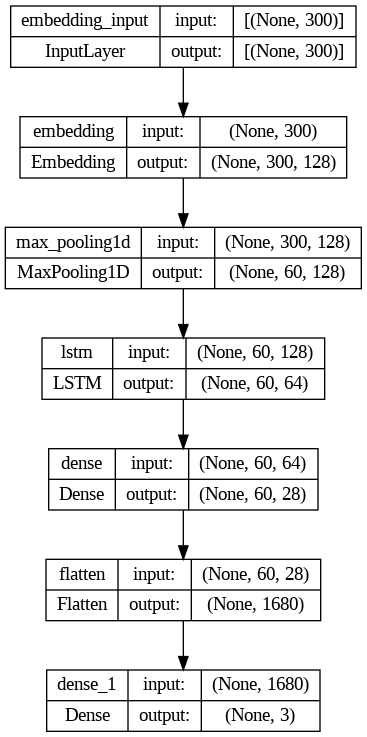

In [84]:
tf.keras.utils.plot_model(model, show_shapes=True)

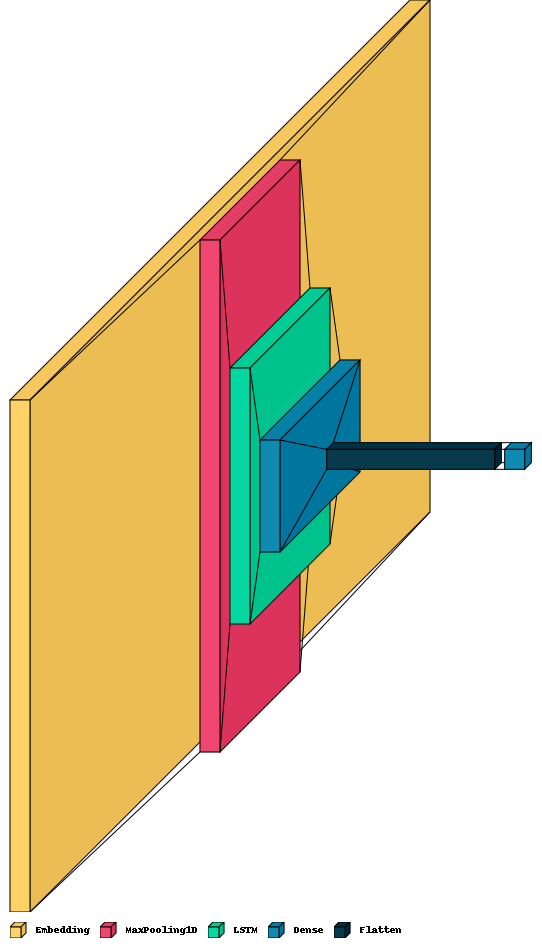

In [85]:
visualkeras.layered_view(model, legend=True)

In [86]:
score = model.evaluate(X_train, y_train,batch_size=64, verbose=2)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

30/30 - 0s - loss: 1.1546e-04 - accuracy: 1.0000 - 205ms/epoch - 7ms/step
Train loss: 0.00011546055611688644
Train accuracy: 1.0


In [87]:
score = model.evaluate(X_test, y_test,batch_size=64, verbose=2)
print('Test loss:', score[0])
acc=score[1]
print('Test accuracy:', acc)


10/10 - 0s - loss: 2.3412 - accuracy: 0.6768 - 81ms/epoch - 8ms/step
Test loss: 2.3412420749664307
Test accuracy: 0.6767676472663879


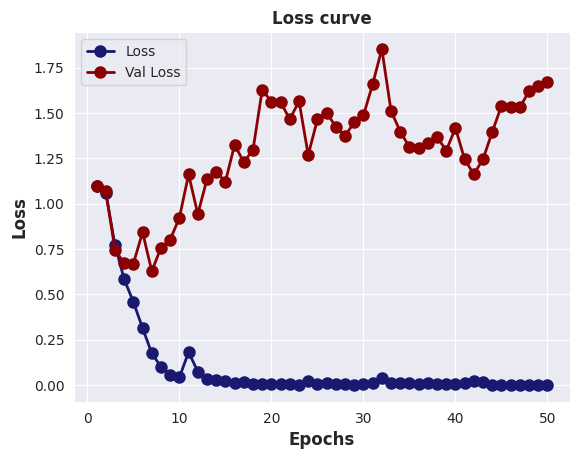

In [88]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
sns.set_style('darkgrid')


plt.plot(epochs, loss_values, color='midnightblue', linewidth = 2,
          marker='o', markersize=8,label='Training Accuracy')
plt.plot(epochs, val_loss_values, color='darkred', linewidth = 2,
          marker='o', markersize=8,label='Training Accuracy')
plt.title('Loss curve',fontsize=12,fontweight='bold')
plt.xlabel('Epochs',fontsize=12,fontweight='bold')
plt.ylabel('Loss',fontsize=12,fontweight='bold')
plt.legend(['Loss','Val Loss'])


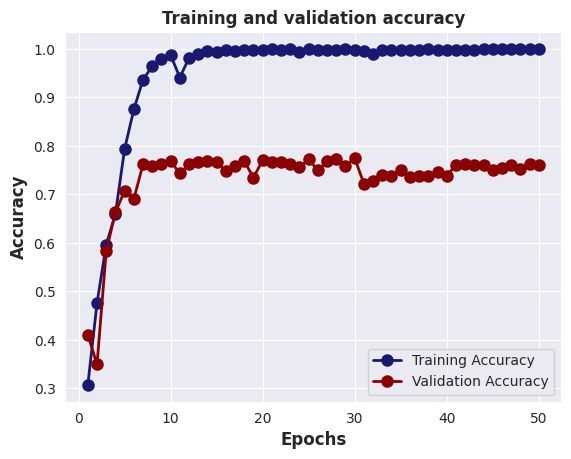

In [89]:
plt.plot(epochs, acc, color='midnightblue', linewidth = 2,
          marker='o', markersize=8,label='Training Accuracy')
plt.plot(epochs, val_acc, color='darkred', linewidth = 2,
          marker='o', markersize=8,label='Training Accuracy')
plt.title('Training and validation accuracy',fontsize=12,fontweight='bold')
plt.xlabel('Epochs',fontsize=12,fontweight='bold')
plt.ylabel('Accuracy',fontsize=12,fontweight='bold')
plt.legend(['Training Accuracy','Validation Accuracy'])

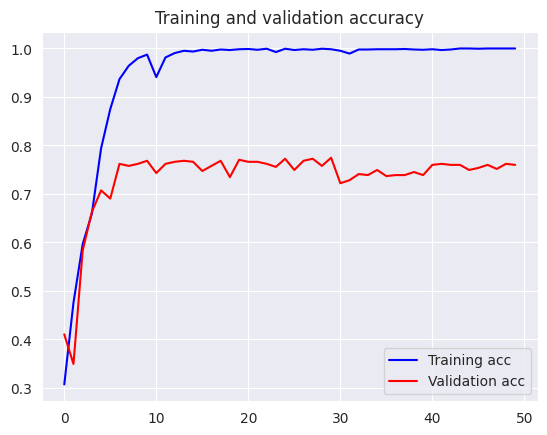

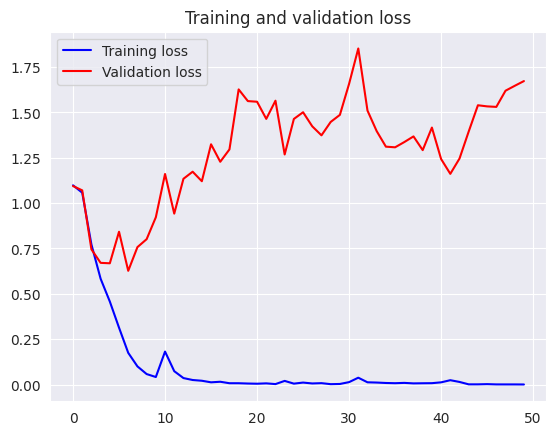

In [90]:
acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [91]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1898, 300), (1898,), (594, 300), (594,))

19/19 [==============================] - 1s 5ms/step


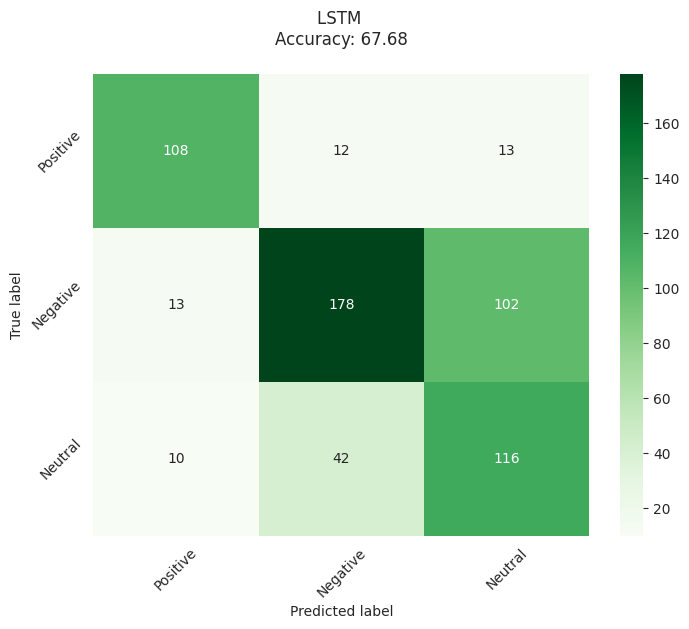

In [92]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, y_pred)

class_names = ["Positive","Negative","Neutral"]
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,index = class_names,columns = class_names)

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="Greens", fmt='g')
plt.title('LSTM \nAccuracy: {0:.2f}\n'.format(accuracy_score(y_test, y_pred)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [93]:
report = pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).transpose()

In [94]:
report = report.rename(index={'0': 'Non-Violence','1':'Passive Violence','2':'Direct Violence'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
Non-Violence,82.44,81.20,81.82,133.000000
Passive Violence,76.72,60.75,67.81,293.000000
Direct Violence,50.22,69.05,58.15,168.000000
accuracy,67.68,67.68,67.68,0.676768
macro avg,69.79,70.33,69.26,594.000000
weighted avg,70.51,67.68,68.21,594.000000


In [95]:
sample_comment = 'সরকারের সব লোক ভারতের দালাল মনে রাখিছ আল্লাহ ছাড় দেয় কিন্তু ছেড়ে দেয়না'
cleaned_comment = process_conversations(sample_comment)

class_names = ["Non-Violence","Passive Violence","Direct Violence"]

# load the saved tokenizer
with open(file_path+'tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)
#print(len(loaded_tokenizer.word_index))
seq= loaded_tokenizer.texts_to_sequences([cleaned_comment])
padded = pad(seq, value=0.0,padding='post', maxlen= 300 )
pred = model.predict(padded)
#print(pred)
class_names[np.argmax(pred)]

1/1 [==============================] - 0s 28ms/step


'Direct Violence'

In [112]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 2.3 MB/s eta 0:00:00


In [114]:
import shap

In [117]:
# import shap
# import numpy as np

# # Create a DeepExplainer instance
# explainer = shap.DeepExplainer(model, data_for_background)  # Provide background data for reference

# # Calculate SHAP values for your test data
# shap_values = explainer.shap_values(X_test)

# # Print the expected value (average prediction)
# print('Expected Value:', explainer.expected_value)

# # Plot SHAP summary plot for the first instance in the test data
# shap.summary_plot(shap_values[0], X_test[0], feature_names=feature_names)


In [113]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

NameError: ignored

In [96]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense

# max_features = max_fatures # Set the maximum number of features
# embed_dim = 64
# filters = 128
# kernel_size = 5

# model = Sequential()
# model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
# model.add(Conv1D(filters, kernel_size, activation='relu'))
# model.add(MaxPooling1D())
# model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.4))
# model.add(Dense(256, activation='softmax'))
# model.add(Dense(2, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()


In [97]:
# Assuming you have already trained the model using the provided code

# Save the trained model to a file
model.save('/content/drive/MyDrive/Research Work/Violence Project/Code/trained_model.h5')

In [98]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Research Work/Violence Project/Code/trained_model.h5')

In [99]:
new_data = pd.read_csv('/content/drive/MyDrive/Research Work/Violence Project/Dataset/dev.csv')

In [100]:
new_data.head()

,text,label
0,পাডা পুতার মাঝখানে পরে সাধারণ ২ মানুষের জিবন শ...,0
1,করোনার চাপে অনেক কিছু বন্ধ ও অনেক বিধি নিষেধ ক...,0
2,সঠিক তদন্ত করতে হবে। বিচারের আওতায় আনতে হবে য...,0
3,যে লোকটা মারা গেছে তার কি হবে তার দায়ভার কে ন...,0
4,নিউ মার্কেট এবং গুলিস্থান মার্কেটের ব্যবসায়ীর...,1


In [101]:
new_data.shape

(1330, 2)

In [102]:
# After training your model
model.save('/content/drive/MyDrive/Research Work/Violence Project/Code')  # Specify the path where you want to save the model

In [103]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Research Work/Violence Project/Code/trained_model.h5')  # Specify the correct path

with open(file_path+'tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)


In [104]:
# new_data="/content/drive/MyDrive/Research Work/Violence Project/Dataset/dev.csv"

In [105]:
new_data.head()

,text,label
0,পাডা পুতার মাঝখানে পরে সাধারণ ২ মানুষের জিবন শ...,0
1,করোনার চাপে অনেক কিছু বন্ধ ও অনেক বিধি নিষেধ ক...,0
2,সঠিক তদন্ত করতে হবে। বিচারের আওতায় আনতে হবে য...,0
3,যে লোকটা মারা গেছে তার কি হবে তার দায়ভার কে ন...,0
4,নিউ মার্কেট এবং গুলিস্থান মার্কেটের ব্যবসায়ীর...,1


In [106]:
new_data['text'] = new_data['text'].apply(process_conversations)

In [107]:

# Convert text to sequences and pad
sequences = loaded_tokenizer.texts_to_sequences(new_data['text'])
padded_sequences = pad_sequences(sequences, value=0.0, padding='post', maxlen=300)

# Generate predictions
predictions = model.predict(padded_sequences)

# Get predicted classes
predicted_classes = [np.argmax(pred) for pred in predictions]

# Map predicted class indices to class names
class_names = ["0", "1", "2"]
predicted_class_names = [class_names[index] for index in predicted_classes]

# Add predicted column to the DataFrame
new_data['predicted'] = predicted_class_names


42/42 [==============================] - 2s 7ms/step


In [108]:
new_data.head()

,text,label,predicted
0,পাডা পুতার মাঝখানে ২ মানুষের জিবন শেষ বিচার,0,1
1,করোনার চাপে বন্ধ বিধি নিষেধ নির্বাচন চলছেই কারন,0,2
2,সঠিক তদন্ত হবে বিচারের আওতায় আনতে টা করেছে,0,1
3,লোকটা মারা দায়ভার নিবে ছাত্র ব্যবসায়ী,0,1
4,নিউ মার্কেট গুলিস্থান মার্কেটের ব্যবসায়ীরা কু...,1,2


In [109]:
# new_data.drop("text",axis=1,inplace=True)

In [110]:
import pandas as pd

# Assuming you have the DataFrame 'test_df' with the added 'predicted' column
output_xlsx_path = '/content/drive/MyDrive/Research Work/Violence Project/Code/path_to_predicted_result.xlsx'  # Specify the correct path and filename

# Save the DataFrame to an Excel file
new_data.to_excel(output_xlsx_path, index=False)


In [111]:
import pandas as pd

# Assuming you have the DataFrame 'new_data' with the added 'predicted' column
output_tsv_path = '/content/drive/MyDrive/Research Work/Violence Project/Code/path_to_predicted_result.tsv'  # Specify the correct path and filename

# Save the DataFrame to a TSV file
new_data.to_csv(output_tsv_path, sep='\t', index=False)